# Task 3. Comparison of classification methods


#### Азизи Бахрам (336243) Г: S4101

###### Tasks completed
* Get data for predicting heart disease here (target feature for prediction --- target ). A demo notebook with an analysis of this data can be found here .
* Read data, perform primary data analysis, if necessary, clean data ( Data Cleaning ).
* Perform exploratory analysis ( EDA ), use visualization, draw conclusions that may be useful in further solving the classification problem.
* If necessary, perform useful data transformations (for example, transform categorical features into quantitative ones), remove unnecessary features, create new ones ( Feature Engineering ).
* Using the selection of hyperparameters , cross-validation and, if necessary, data scaling , achieve the best prediction quality from your implementation on a pre-selected test sample.
* Repeat the previous point for library implementations (e.g. from sklearn ) of all passed classification methods ( logistic regression, svm, knn, naive bayes, decision tree ).
* Compare all trained models, plot their confusion matrices . Draw conclusions about the models obtained in the framework of solving the classification problem on the selected data.
* ( +2 points ) Independently implement one of the classification methods, with the ability to adjust hyperparameters and add it to the comparison.
* ( +3 points ) Find data on which it will be interesting to solve the classification problem. Repeat all the tasks on the new data.

# 1. Let's Import all necessary libraries

In [1]:
from src import KNeighborsClassifier as MyKNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFECV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
from scipy import stats
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
import os

# This is my file path for the lab works
os.chdir("C:/Users/bahra/Desktop/ITMO Master's/2nd Semester/Deep Learning/Lab_3")

## 2. Loading the dataset into a dataframe

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Возьмём данные заболеваний сердца у пациентов, которые можно скачать [тут](https://www.kaggle.com/code/ahmedadell30/heart-disease-prediction-with-ann-models/data).

Описание датасета: <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

Необходимо решить задачу классификации и научиться предсказывать целовой признак **target** имеет ли пациент заболевание сердца.

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.shape

(1025, 14)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

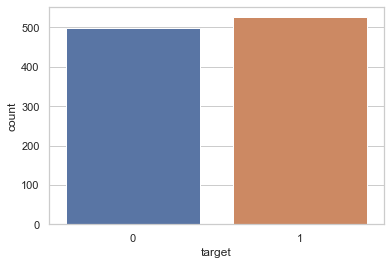

In [8]:
sns.countplot(x="target", data=df)
plt.show()

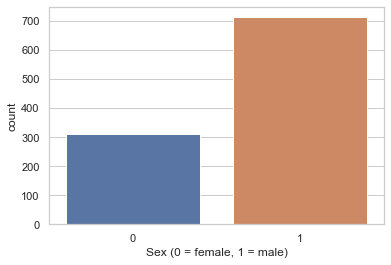

In [9]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [10]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


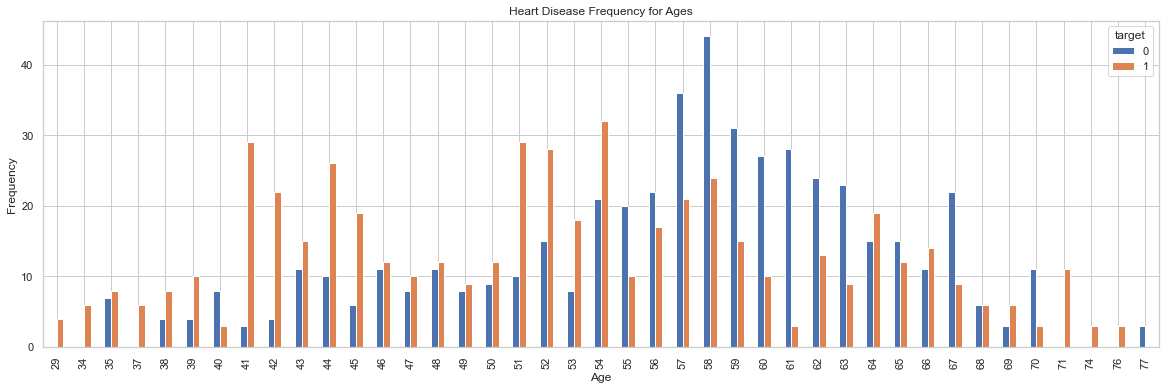

In [11]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

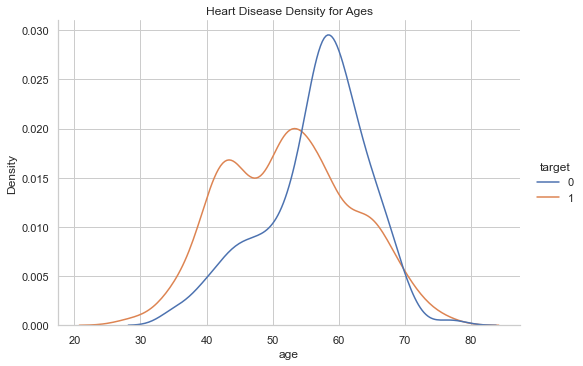

In [12]:
ax = sns.displot(x="age", data=df, kind="kde", hue="target", height=5, aspect=1.5)
plt.title("Heart Disease Density for Ages")
plt.show()

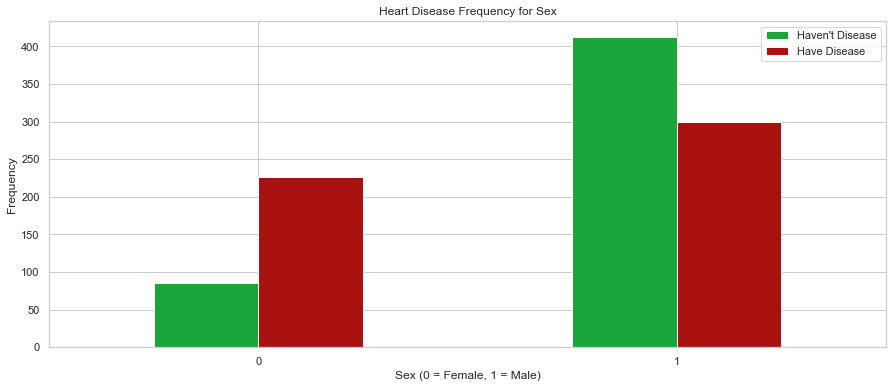

In [13]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

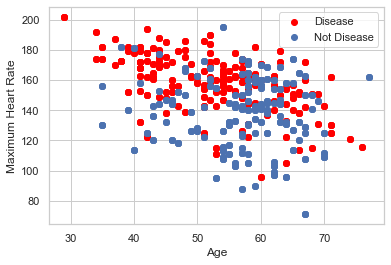

In [14]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

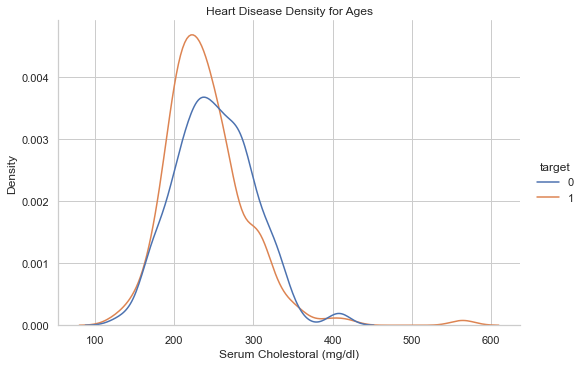

In [15]:
ax = sns.displot(x="chol", data=df, kind="kde", hue="target", height=5, aspect=1.5)
plt.title("Heart Disease Density for Ages")
plt.xlabel("Serum Cholestoral (mg/dl)")
plt.show()

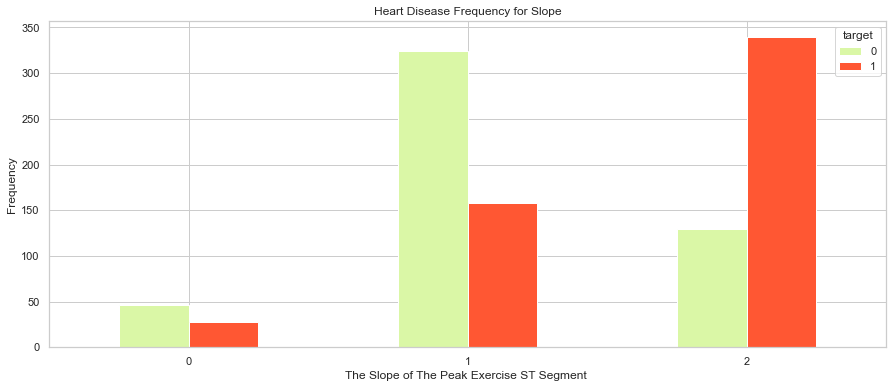

In [16]:
pd.crosstab(df.slope,df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

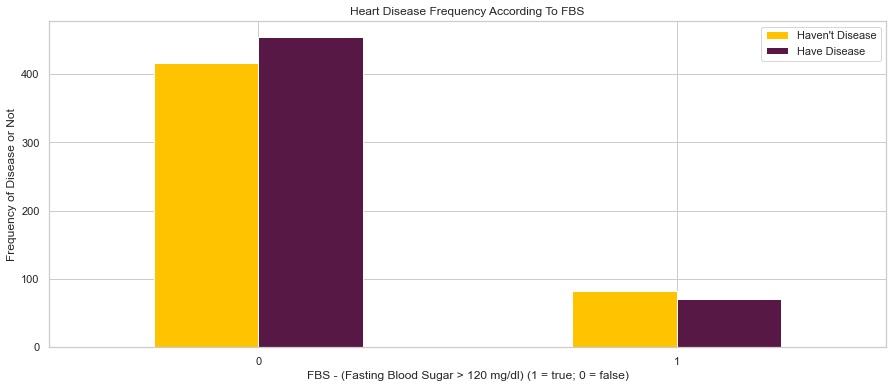

In [17]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(15, 6), color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

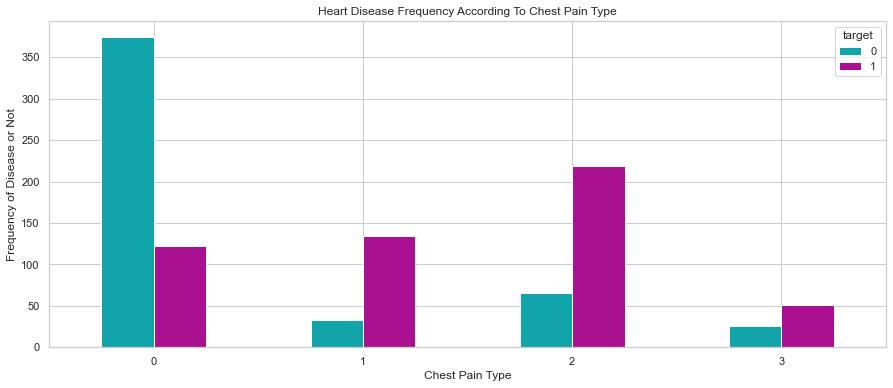

In [18]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15, 6), color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

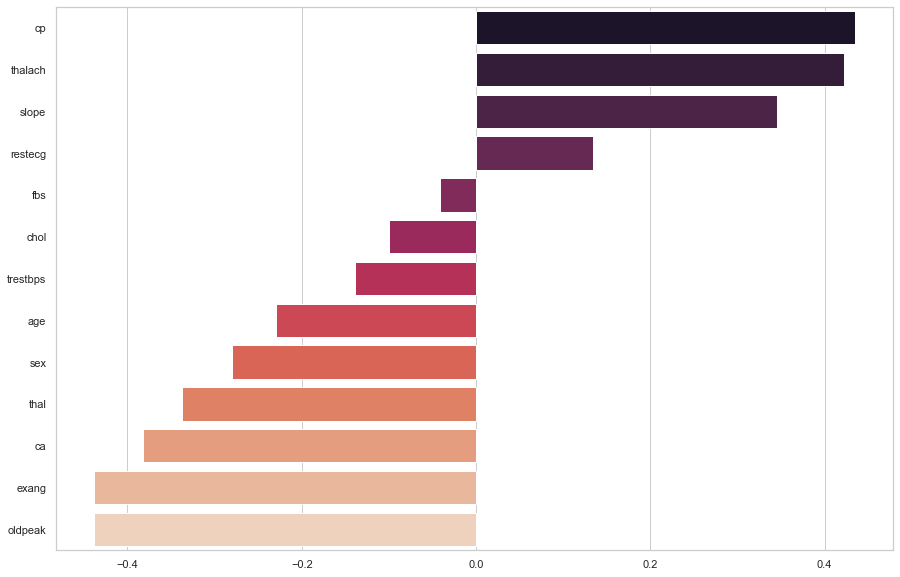

In [19]:
y = df["target"]
X = df.drop(columns=["target"])

numeric_data = X.select_dtypes([np.number])
numeric_data = X.select_dtypes([np.number])
numeric_features = numeric_data.columns

correlations = X[numeric_features].corrwith(y).sort_values(ascending=False)
palette = sns.color_palette("rocket", correlations.size)
plot = sns.barplot(y=correlations.index, x=correlations, palette=palette)
plot.figure.set_size_inches(15, 10)

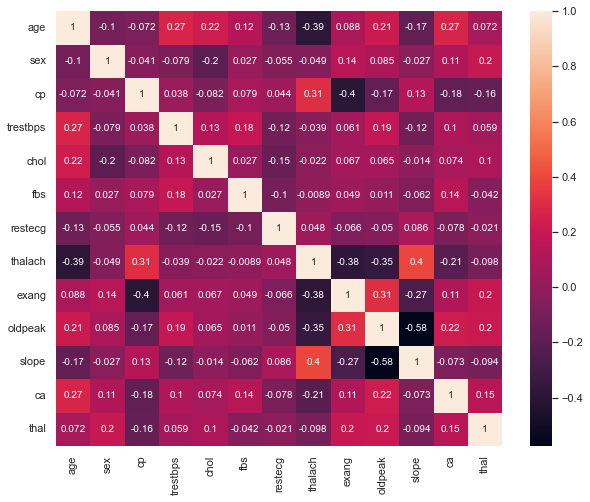

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(X[numeric_features].corr(), annot=True)
plt.show()

Note that the target feature correlates most strongly with "cp", "thalach", "exang", and "oldpeak".

### Feature Engineering
Let's transform the features sex, cp, fbs, restecg, exang, ca, thal into categorical ones

In [21]:
to_cat = ["sex", "cp", "fbs", "restecg", "exang", "ca", "thal"]

df[to_cat] = df[to_cat].astype("category")

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

numeric_data = X.select_dtypes([np.number])
cat_data = X.select_dtypes(["category"])
numeric_features = numeric_data.columns
cat_features = cat_data.columns

## Pipelines
Each pipeline consists of the following steps:

* Scaling and OHE Encoding
* RFE
* Classification

In [23]:
accuracies = {}

def create_column_transformer():
    column_transformer = ColumnTransformer(
        [
            ("ohe", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_features),
            ("scaling", StandardScaler(), numeric_features),
        ]
    )
    return column_transformer


def create_logistic_regression(C=1.0, column_transformer=create_column_transformer()):

    pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            ("rfe", RFECV(estimator=LogisticRegression())),
            ("classification", LogisticRegression(C=C)),
        ]
    )
    return pipeline

def create_decision_tree(
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    column_transformer=create_column_transformer(),
):
    column_transformer = create_column_transformer()

    pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            ("rfe", RFECV(estimator=LogisticRegression())),
            (
                "classification",
                DecisionTreeClassifier(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                ),
            ),
        ]
    )
    return pipeline


def create_my_knn(k=5, column_transformer=create_column_transformer()):

    pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            ("rfe", RFECV(estimator=LogisticRegression())),
            (
                "classification",
                MyKNN(k),
            ),
        ]
    )
    return pipeline


def create_knn(n_neighbors=3, column_transformer=create_column_transformer()):

    pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            ("rfe", RFECV(estimator=LogisticRegression())),
            (
                "classification",
                KNeighborsClassifier(n_neighbors=3),
            ),
        ]
    )
    return pipeline


def create_nb(var_smoothing=1e-09, column_transformer=create_column_transformer()):

    pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            ("rfe", RFECV(estimator=LogisticRegression())),
            (
                "classification",
                GaussianNB(var_smoothing=var_smoothing),
            ),
        ]
    )
    return pipeline


def create_svm(C=1.0, column_transformer=create_column_transformer()):

    pipeline = Pipeline(
        steps=[
            ("ohe_and_scaling", column_transformer),
            ("rfe", RFECV(estimator=LogisticRegression())),
            (
                "classification",
                SVC(C=C),
            ),
        ]
    )
    return pipeline

## General Model Evaluation Steps
* To evaluate each classification algorithm, we first select the optimal hyperparameters using cross-validation on the training set. 
*Then we get predictions on the test sample.

# Implemented KNN Modeling

In [24]:
ks = [3, 5, 7, 9, 11]

searcher = GridSearchCV(
    create_my_knn(),
    [
        {
            "classification__k": ks,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_k = searcher.best_params_["classification__k"]

In [25]:
myknn_pipe = create_my_knn(best_k)
myknn_pipe.fit(X_train, y_train)
y_pred = myknn_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["Implemented KNN"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.9058


## Built-in Classification Algorithms Modeling

### GridSearchCV

In [26]:
Cs = np.logspace(-5, 3, 20)
searcher = GridSearchCV(
    create_logistic_regression(),
    [{"classification__C": Cs}],
    scoring="f1",
    cv=10,
)
searcher.fit(X_train, y_train)

best_C = searcher.best_params_["classification__C"]

In [27]:
lr_pipe = create_logistic_regression(best_C)
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["Logistic Regression"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.8539


### Decision Tree

In [28]:
depths = np.arange(7, 15)
min_samples_splits = [2, 5, 7]
min_samples_leafs = [1, 3, 5]

searcher = GridSearchCV(
    create_decision_tree(),
    [
        {
            "classification__max_depth": depths,
            "classification__min_samples_split": min_samples_splits,
            "classification__min_samples_leaf": min_samples_leafs,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_depth = searcher.best_params_["classification__max_depth"]
best_min_samples_split = searcher.best_params_["classification__min_samples_split"]
best_min_samples_leaf = searcher.best_params_["classification__min_samples_leaf"]

In [29]:
dt_pipe = create_decision_tree(
    best_depth, best_min_samples_split, best_min_samples_leaf
)
dt_pipe.fit(X_train, y_train)
y_pred = dt_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["Decision Tree"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.9740


### KNN

In [30]:
n_neighbors = [1, 3, 5, 7, 9, 11]
searcher = GridSearchCV(
    create_knn(),
    [
        {
            "classification__n_neighbors": n_neighbors,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_n_neighbors = searcher.best_params_["classification__n_neighbors"]

In [31]:
knn_pipe = create_knn(best_n_neighbors)
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["KNN"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.9058


### Naive Bayes

In [32]:
var_smoothing = np.logspace(0, -9, num=50)
searcher = GridSearchCV(
    create_nb(),
    [
        {
            "classification__var_smoothing": var_smoothing,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_var_smoothing = searcher.best_params_["classification__var_smoothing"]

In [33]:
nb_pipe = create_nb(best_var_smoothing)
nb_pipe.fit(X_train, y_train)
y_pred = nb_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["Naive Bayes"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.8149


### SVM

In [34]:
Cs = np.logspace(-5, 3, 20)
searcher = GridSearchCV(
    create_svm(),
    [{"classification__C": Cs}],
    scoring="f1",
    cv=10,
)
searcher.fit(X_train, y_train)
best_C = searcher.best_params_["classification__C"]

In [35]:
svm_pipe = create_svm(best_C)
svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["SVM"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.9643


## Let's Compare the models

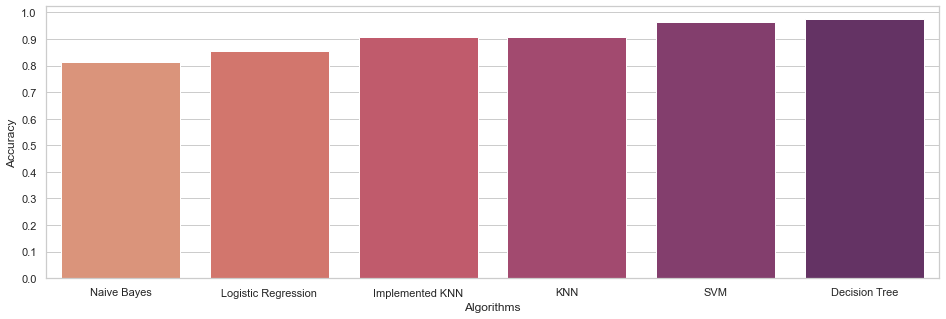

In [36]:
accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1]))

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(
    x=list(accuracies.keys()),
    y=list(accuracies.values()),
    palette=sns.color_palette("flare", len(accuracies)),
)
plt.show()

### Observations
* As we can see the best accuracy classifition results are obtained from Decision Tree and SVM
* Our Implemented KNN is working the as KNN from sklearn

### Let's get the predicted values for Confusion Matrix

In [37]:
y_pred_nb = nb_pipe.predict(X_test)
y_pred_lr = lr_pipe.predict(X_test)
y_pred_knn = knn_pipe.predict(X_test)
y_pred_my_knn = myknn_pipe.predict(X_test)
y_pred_svm = svm_pipe.predict(X_test)
y_pred_dt = dt_pipe.predict(X_test)

In [38]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_myknn = confusion_matrix(y_test, y_pred_my_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_dt = confusion_matrix(y_test, y_pred_dt)

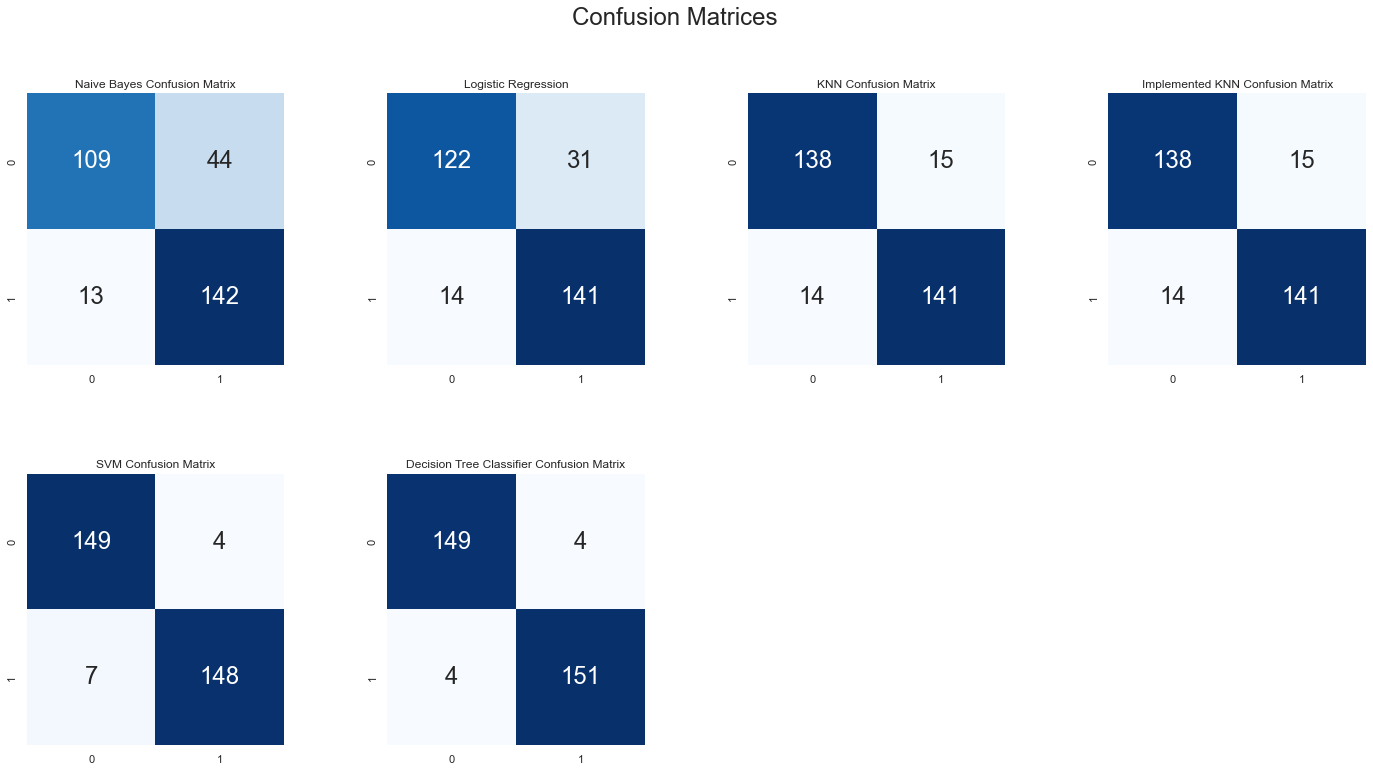

In [39]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2, 4, 1)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(
    cm_nb, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 2)
plt.title("Logistic Regression")
sns.heatmap(
    cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 3)
plt.title("KNN Confusion Matrix")
sns.heatmap(
    cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 4)
plt.title("Implemented KNN Confusion Matrix")
sns.heatmap(
    cm_myknn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 5)
plt.title("SVM Confusion Matrix")
sns.heatmap(
    cm_svm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 6)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(
    cm_dt, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.show()

# Test on Second Dataset


# About the dataset

CV:https://www.muratkoklu.com/en/publications/
DATASET: https://www.muratkoklu.com/datasets/

Citation Request :
CINAR I., KOKLU M. and TASDEMIR S., (2020). Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods, Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, December, 2020, DOI: https://doi.org/10.30855/gmbd.2020.03.03

Article Download (PDF): https://dergipark.org.tr/tr/download/article-file/1227592

ABSTRACT: In this study, machine vision system was developed in order to distinguish between two different variety of raisins (Kecimen and Besni) grown in Turkey. Firstly, a total of 900 pieces raisin grains were obtained, from an equal number of both varieties. These images were subjected to various preprocessing steps and 7 morphological feature extraction operations were performed using image processing techniques. In addition, minimum, mean, maximum and standard deviation statistical information was calculated for each feature. The distributions of both raisin varieties on the features were examined and these distributions were shown on the graphs. Later, models were created using LR, MLP, and SVM machine learning techniques and performance measurements were performed. The classification achieved 85.22% with LR, 86.33% with MLP and 86.44% with the highest classification accuracy obtained in the study with SVM. Considering the number of data available, it is possible to say that the study was successful.

In [40]:
df = pd.read_excel('Raisin_Dataset.xlsx')
y = df['Class'].values

df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


## EDA

In [41]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


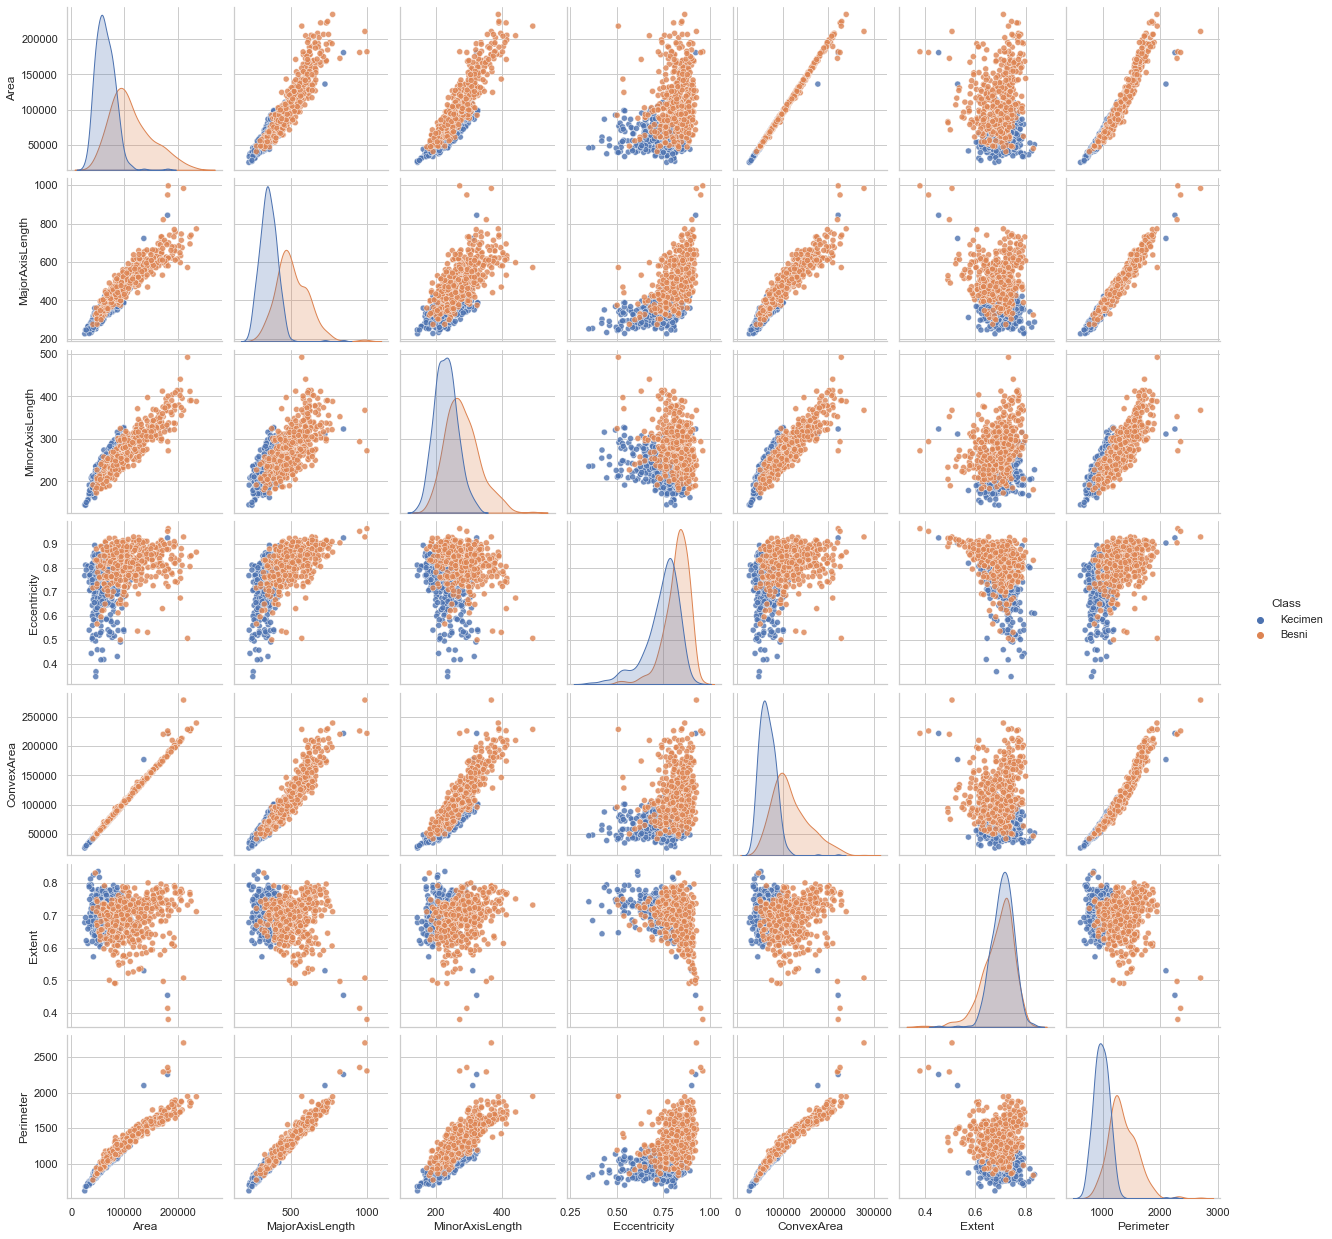

In [43]:
sns.pairplot(df, hue = 'Class', plot_kws={'alpha': 0.8})

## Encoding the class to numbers

In [44]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(df['Class'])
y.shape

(900,)

In [45]:
features = ['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter','Class']
df2 = df[features]
df2

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...
895,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


<AxesSubplot:>

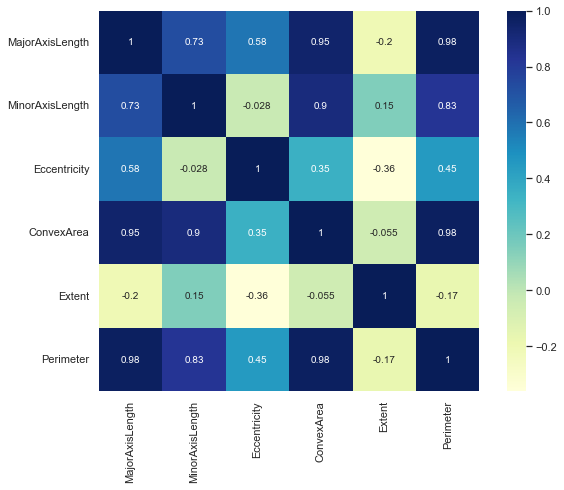

In [46]:
plt.figure(figsize=(10,7))
sns.heatmap(df2.corr(), cmap = 'YlGnBu', annot = True, square = True)

## Split the data

In [47]:
X = df2.drop(columns=["Class"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

## Scale the data

In [48]:
def create_column_transformer():
    column_transformer = ColumnTransformer(
        [
            ("scaling", StandardScaler(), X.columns),
        ]
    )
    return column_transformer
accuracies = {}

# Logistic Regression

In [49]:
Cs = np.logspace(-5, 3, 20)
searcher = GridSearchCV(
    create_logistic_regression(column_transformer=create_column_transformer()),
    [{"classification__C": Cs}],
    scoring="f1",
    cv=10,
)
searcher.fit(X_train, y_train)

best_C = searcher.best_params_["classification__C"]

In [50]:
lr_pipe = create_logistic_regression(
    best_C, column_transformer=create_column_transformer()
)
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["Logistic Regression"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.8500


# Decision Tree

In [51]:
depths = np.arange(7, 15)
min_samples_splits = [2, 5, 7]
min_samples_leafs = [1, 3, 5]

searcher = GridSearchCV(
    create_decision_tree(column_transformer=create_column_transformer()),
    [
        {
            "classification__max_depth": depths,
            "classification__min_samples_split": min_samples_splits,
            "classification__min_samples_leaf": min_samples_leafs,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_depth = searcher.best_params_["classification__max_depth"]
best_min_samples_split = searcher.best_params_["classification__min_samples_split"]
best_min_samples_leaf = searcher.best_params_["classification__min_samples_leaf"]

In [52]:
dt_pipe = create_decision_tree(
    best_depth,
    best_min_samples_split,
    best_min_samples_leaf,
    column_transformer=create_column_transformer(),
)
dt_pipe.fit(X_train, y_train)
y_pred = dt_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["Decision Tree"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.8111


# Implemented KNN

In [53]:
ks = [3, 5, 7, 9, 11]

searcher = GridSearchCV(
    create_my_knn(column_transformer=create_column_transformer()),
    [
        {
            "classification__k": ks,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_k = searcher.best_params_["classification__k"]

In [54]:
myknn_pipe = create_my_knn(best_k, column_transformer=create_column_transformer())
myknn_pipe.fit(X_train, y_train)
y_pred = myknn_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["Implemented KNN"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.8472


# KNN

In [55]:
n_neighbors = [1, 3, 5, 7, 9, 11]
searcher = GridSearchCV(
    create_knn(column_transformer=create_column_transformer()),
    [
        {
            "classification__n_neighbors": n_neighbors,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_n_neighbors = searcher.best_params_["classification__n_neighbors"]

In [56]:
knn_pipe = create_knn(best_n_neighbors, column_transformer=create_column_transformer())
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["KNN"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.8167


# Naive Bayes

In [57]:
var_smoothing = np.logspace(0, -9, num=50)
searcher = GridSearchCV(
    create_nb(column_transformer=create_column_transformer()),
    [
        {
            "classification__var_smoothing": var_smoothing,
        }
    ],
    scoring="f1",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_var_smoothing = searcher.best_params_["classification__var_smoothing"]

In [58]:
nb_pipe = create_nb(best_var_smoothing, create_column_transformer())
nb_pipe.fit(X_train, y_train)
y_pred = nb_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["Naive Bayes"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.8556


# SVM

In [59]:
Cs = np.logspace(-5, 3, 20)
searcher = GridSearchCV(
    create_svm(column_transformer=create_column_transformer()),
    [{"classification__C": Cs}],
    scoring="f1",
    cv=10,
)
searcher.fit(X_train, y_train)
best_C = searcher.best_params_["classification__C"]

In [60]:
svm_pipe = create_svm(best_C, column_transformer=create_column_transformer())
svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
accuracies["SVM"] = acc
print(f"Test Accuracy {acc:.4f}")

Test Accuracy 0.8500


# Let's Compare the models

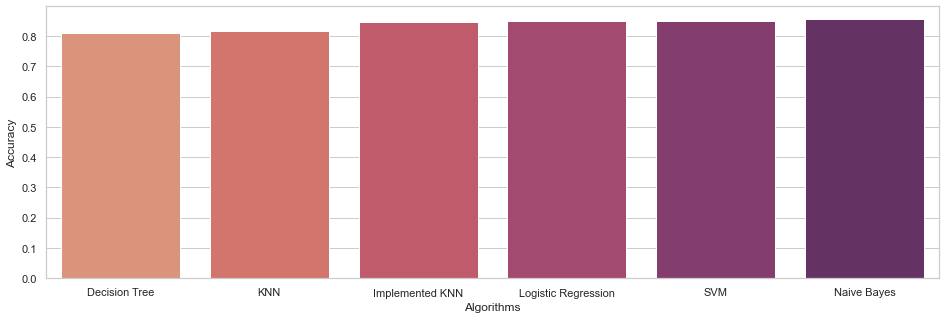

In [61]:
accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1]))

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(
    x=list(accuracies.keys()),
    y=list(accuracies.values()),
    palette=sns.color_palette("flare", len(accuracies)),
)
plt.show()

In [62]:
y_pred_nb = nb_pipe.predict(X_test)
y_pred_lr = lr_pipe.predict(X_test)
y_pred_knn = knn_pipe.predict(X_test)
y_pred_my_knn = myknn_pipe.predict(X_test)
y_pred_svm = svm_pipe.predict(X_test)
y_pred_dt = dt_pipe.predict(X_test)

In [63]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_myknn = confusion_matrix(y_test, y_pred_my_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_dt = confusion_matrix(y_test, y_pred_dt)

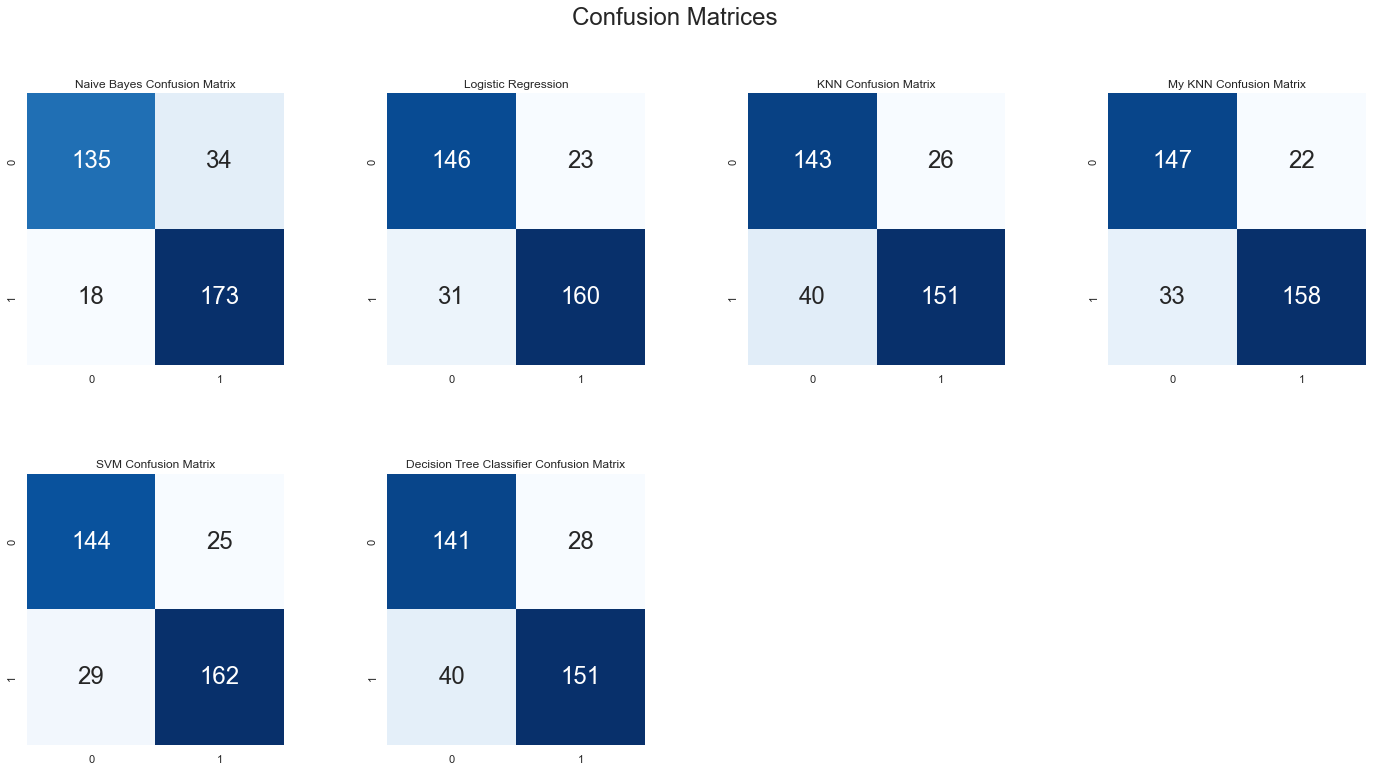

In [64]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2, 4, 1)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(
    cm_nb, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 2)
plt.title("Logistic Regression")
sns.heatmap(
    cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 3)
plt.title("KNN Confusion Matrix")
sns.heatmap(
    cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 4)
plt.title("My KNN Confusion Matrix")
sns.heatmap(
    cm_myknn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 5)
plt.title("SVM Confusion Matrix")
sns.heatmap(
    cm_svm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 4, 6)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(
    cm_dt, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.show()

# Conclusion
* The best Model is Naive Bayes (most likely, because of the simplicity of the classes)
* The worst model is Decesion Tree (most likely, because of trees overfitting)
* Impelemented KNN is working better than sklearn KNN
